In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
from NeuroNet import *
%config InlineBackend.figure_formats=['svg']
plt.rcParams["figure.figsize"] = (13, 2)
import time

# An Agent-based Model of a Neuronal Network

##### Sahand Hariri
Spring 2017

# Design of the simulation

+ Each Neuron is modeled as an agent. 
+ The governing model for each neuron is the Fittzhugh-Nagumo model (shown later). 
+ Each neuron contains a list of neurons to which it has formed a synapse.
+ There is an object called "Brain" that controls the simulation.


# Fittshugh-Nagumo Model

There are two variables $V$ and $w$ in the model which represent memberane potential (fast variable), and the current flow (slow variable) respectively. 
The equations are as follow:

\begin{align*}
\frac{dV_i}{dt} =& V_i - \frac{V_i^3}{3} - w_i + I + s_iV_j\\
\frac{dw_i}{dt} =& \frac{1}{\tau}(V_i + a - b w_i)
\end{align*}

As can be seen, there are four parameters in the system: 

- $a = unif(0.6,0.9)$ 
- $b = unif(0.5,0.9)$
- $\tau = unif(10,14)$
- $I = \begin{cases}1, i=1\\ 0, i\neq1 \end{cases}$, for neuron number $i$. 
- $s_i = unif(0.09,0.11)$

In [3]:
t1 = time.time()
tend = 400
dt   = 0.1

numNeurons = 10
displaynum = min(10,numNeurons)
neurons = []


for i in range(numNeurons):
    phi       = 1
    theta_syn = 1
    k         = 1
    g_syn     = 1
    v_syn     = 1
    
    if i==0:
        I=1
    else:
        I=0
    n = Neuron(i,dt=dt,tend=tend,a=random.uniform(0.6,0.9),b=random.uniform(0.5,0.9),tau=random.uniform(10,14),I=I,phi=phi, theta_syn=theta_syn, k=k, g_syn=g_syn,v_syn=v_syn)
    n.SetFlow(n.FHNFlow)
    neurons.append(n)
    
b = Brain(neurons=neurons,dt=dt,tend=tend, connectionscale=15)
b.Simulate()
t2 = time.time()
print("Total simulation time: {:2.2f} s.".format(t2-t1))


Total simulation time: 4.53 s.


# Network formed between neurons (100 Neurons)

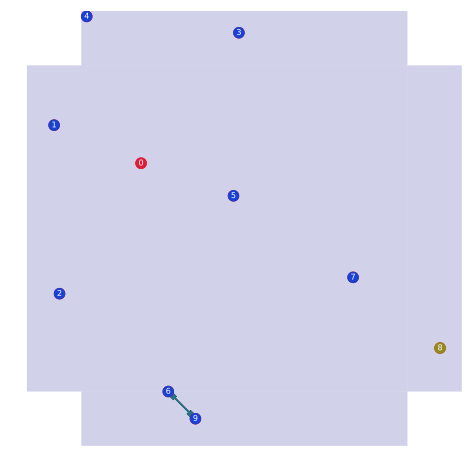

In [4]:
plt.rcParams["figure.figsize"] = (8,8)
vis = Visualization(network=b._Network,neurons=b._Neurons, synapsecount=b._SynapseCountHistory)
vis.DrawNetwork(edgelabels=False)

Note: The connections are directed since synapses are one sided connections. 

# Action potential observed in active neurons:

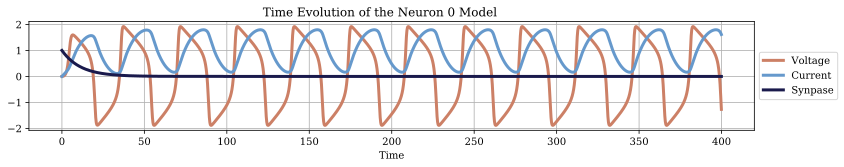

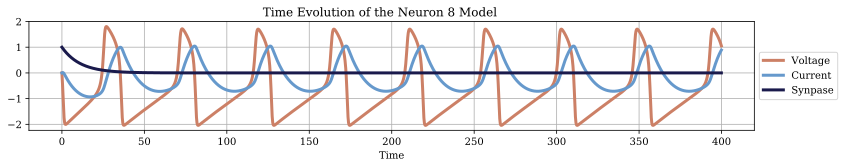

Displaying 2 active neurons. 0 more active neurons are present.


In [6]:
plt.rcParams["figure.figsize"] = (13, 2)
b.CollectActiveNeurons()
ActiveNeurons = b._ActiveNeurons;
numberToShow = min(5,len(ActiveNeurons))
for n in range(numberToShow):
    ActiveNeurons[n].PlotState(states={0:"V",1:"w",2:"s"},legend=["Voltage","Current","Synpase"],colors=[[0.8,0.5,0.4],[0.4,0.6,0.8],[0.1,0.1,0.3]])
print("Displaying {} active neurons. {} more active neurons are present.".format(numberToShow,len(ActiveNeurons)-numberToShow))

# Some Network properties

### Connectivity Properties and Degree Distributions:

In [7]:
plt.rcParams["figure.figsize"] = (12, 2)
vis.PlotSynapseRank()

AttributeError: 'Visualization' object has no attribute '_SynapseCountHistory'

In [ ]:
plt.rcParams["figure.figsize"] = (16,2)
vis.PlotConnectivityProperties()

In [ ]:
plt.rcParams["figure.figsize"] = (16,2)
vis.PlotDegreeDistribution()

# Eigenvalues:

In [ ]:
plt.rcParams["figure.figsize"] = (14,5)
b.PlotEigenValues()